In [ ]:
#install the dependenies
 
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"gauravrajpal","key":"df3b8aca71bf659774a349a9fc5fc412"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change the permission 
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Viewing kaggle dataset 

!kaggle datasets list

ref                                                     title                                         size  lastUpdated          downloadCount  
------------------------------------------------------  -------------------------------------------  -----  -------------------  -------------  
unanimad/us-election-2020                               US Election 2020                             429KB  2020-11-13 12:45:46           3467  
manchunhui/us-election-2020-tweets                      US Election 2020 Tweets                      353MB  2020-11-09 18:51:59           2059  
antgoldbloom/covid19-data-from-john-hopkins-university  COVID-19 data from John Hopkins University     2MB  2020-11-13 06:04:14            984  
headsortails/us-election-2020-presidential-debates      US Election 2020 - Presidential Debates      199MB  2020-10-23 16:56:10            393  
etsc9287/2020-general-election-polls                    2020 General Election Polls                  109KB  2020-02-09 08:20:59   

In [ ]:
# To view specific dataset 

!kaggle datasets list -s 'bird species classification'

ref                                                            title                                               size  lastUpdated          downloadCount  
-------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
gpiosenka/100-bird-species                                     225 Bird Species                                     1GB  2020-07-31 17:15:30           5246  
akash2907/bird-species-classification                          bird species classification                          1GB  2018-09-30 00:47:56           2308  
veeralakrishna/200-bird-species-with-11788-images              200 Bird Species with 11,788 Images                  1GB  2020-01-10 13:57:20            875  
rohanrao/xeno-canto-bird-recordings-extended-a-m               Xeno-Canto Bird Recordings Extended (A-M)           17GB  2020-09-14 09:51:58            575  
rohanrao/xeno-canto-bird-recordings-extended-n-z    

In [ ]:
!kaggle datasets download -d gpiosenka/100-bird-species

 99% 1.35G/1.37G [00:18<00:00, 111MB/s]
100% 1.37G/1.37G [00:18<00:00, 80.7MB/s]


In [ ]:
!unzip *.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/SUPERB STARLING/068.jpg  
  inflating: train/SUPERB STARLING/069.jpg  
  inflating: train/SUPERB STARLING/070.jpg  
  inflating: train/SUPERB STARLING/071.jpg  
  inflating: train/SUPERB STARLING/072.jpg  
  inflating: train/SUPERB STARLING/073.jpg  
  inflating: train/SUPERB STARLING/074.jpg  
  inflating: train/SUPERB STARLING/075.jpg  
  inflating: train/SUPERB STARLING/076.jpg  
  inflating: train/SUPERB STARLING/077.jpg  
  inflating: train/SUPERB STARLING/078.jpg  
  inflating: train/SUPERB STARLING/079.jpg  
  inflating: train/SUPERB STARLING/080.jpg  
  inflating: train/SUPERB STARLING/081.jpg  
  inflating: train/SUPERB STARLING/082.jpg  
  inflating: train/SUPERB STARLING/083.jpg  
  inflating: train/SUPERB STARLING/084.jpg  
  inflating: train/SUPERB STARLING/085.jpg  
  inflating: train/SUPERB STARLING/086.jpg  
  inflating: train/SUPERB STARLING/087.jpg  
  inflating: train/SUPERB STARLING/088.jpg  
  in

### IMPORTING LIBRARY 


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import os 
import glob
import tqdm
import tensorflow

from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

from keras.preprocessing.image import load_img,img_to_array

%matplotlib inline

### IMPORT / VIEWING / PREPROCESSING DATASET

In [ ]:
generator = ImageDataGenerator()
batches   = generator.flow_from_directory('/content/train')

Found 31316 images belonging to 225 classes.


In [ ]:
indices = batches.class_indices

labels  = list(indices.keys())
labels

['AFRICAN FIREFINCH',
 'ALBATROSS',
 'ALEXANDRINE PARAKEET',
 'AMERICAN AVOCET',
 'AMERICAN BITTERN',
 'AMERICAN COOT',
 'AMERICAN GOLDFINCH',
 'AMERICAN KESTREL',
 'AMERICAN PIPIT',
 'AMERICAN REDSTART',
 'ANHINGA',
 'ANNAS HUMMINGBIRD',
 'ANTBIRD',
 'ARARIPE MANAKIN',
 'ASIAN CRESTED IBIS',
 'BALD EAGLE',
 'BALI STARLING',
 'BALTIMORE ORIOLE',
 'BANANAQUIT',
 'BAR-TAILED GODWIT',
 'BARN OWL',
 'BARN SWALLOW',
 'BARRED PUFFBIRD',
 'BAY-BREASTED WARBLER',
 'BEARDED BARBET',
 'BELTED KINGFISHER',
 'BIRD OF PARADISE',
 'BLACK FRANCOLIN',
 'BLACK SKIMMER',
 'BLACK SWAN',
 'BLACK THROATED WARBLER',
 'BLACK VULTURE',
 'BLACK-CAPPED CHICKADEE',
 'BLACK-NECKED GREBE',
 'BLACK-THROATED SPARROW',
 'BLACKBURNIAM WARBLER',
 'BLUE GROUSE',
 'BLUE HERON',
 'BOBOLINK',
 'BROWN NOODY',
 'BROWN THRASHER',
 'CACTUS WREN',
 'CALIFORNIA CONDOR',
 'CALIFORNIA GULL',
 'CALIFORNIA QUAIL',
 'CANARY',
 'CAPE MAY WARBLER',
 'CAPUCHINBIRD',
 'CARMINE BEE-EATER',
 'CASPIAN TERN',
 'CASSOWARY',
 'CHARA DE COLLAR'

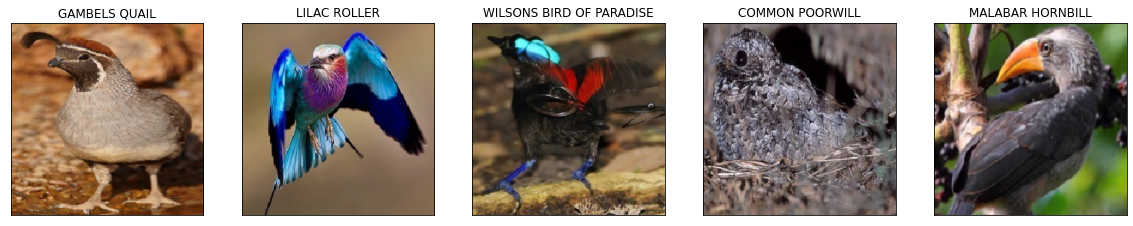

In [ ]:
for X, y in batches:
    fig, ax = plt.subplots(1, 5, figsize=(20, 20))
    
    for i in range(0,5):
        img = X[i].astype('int')
        label = labels[np.argmax(y[i])]
        ax[i].imshow(img)
        ax[i].set_title(label)
        ax[i].set_xticks([])
        ax[i].set_yticks([])

    
    plt.show()
    break # We only need the first batch

> `DATA AUGMENTATAION`


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1/255,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   rotation_range=30,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale = 1/255)

test_datagen  = ImageDataGenerator(rescale = 1/255)

In [ ]:
# Reading Directories 

train_directory = '/content/train'
val_directory   = '/content/valid'
test_directory  = '/content/test'

In [ ]:
train_generator=train_datagen.flow_from_directory(train_directory,
                                                  target_size=(224,224),
                                                  color_mode='rgb',
                                                  class_mode='sparse',
                                                  batch_size=256)

Found 31316 images belonging to 225 classes.


In [ ]:
val_generator=valid_datagen.flow_from_directory(val_directory,
                                               target_size=(224,224),
                                               color_mode='rgb',
                                               class_mode='sparse',
                                               batch_size=256)

Found 1125 images belonging to 225 classes.


In [ ]:
test_gemerator=test_datagen.flow_from_directory(test_directory,
                                                target_size=(224,224),
                                                color_mode='rgb',
                                                class_mode='sparse',
                                                batch_size=256)

Found 1125 images belonging to 225 classes.


### BUILDING MODEL

In [ ]:
# Model Initialization

from keras.applications.inception_resnet_v2 import InceptionResNetV2

base_model = InceptionResNetV2(input_shape=(224,224,3),
                               weights='imagenet',
                               include_top=False)

219062272/219055592 [==============================] - 2s 0us/step


In [ ]:
# Freezing Layers

for layer in base_model.layers:
    layer.trainable=False

In [ ]:
# Building Model

model=Sequential()
model.add(base_model)
model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(2048,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1024,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(225,activation='softmax'))

In [ ]:
# Summary 

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inception_resnet_v2 (Functio (None, 5, 5, 1536)        54336736  
_________________________________________________________________
dropout (Dropout)            (None, 5, 5, 1536)        0         
_________________________________________________________________
flatten (Flatten)            (None, 38400)             0         
_________________________________________________________________
batch_normalization_203 (Bat (None, 38400)             153600    
_________________________________________________________________
dense (Dense)                (None, 2048)              78645248  
_________________________________________________________________
batch_normalization_204 (Bat (None, 2048)              8192      
_________________________________________________________________
activation_203 (Activation)  (None, 2048)              0

In [ ]:
# Model Compile

opt=tensorflow.keras.optimizers.Adam(lr=0.001)

model.compile(loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              optimizer=opt)

In [ ]:
import os 
os.getcwd()

'/content'

In [ ]:
# Define Callbacks 

filepath = './best_weights.hdf5'

earlystopping = EarlyStopping(monitor = 'val_accuracy', 
                              mode = 'max' , 
                              patience = 10,
                              verbose = 1)

checkpoint    = ModelCheckpoint(filepath, 
                                monitor = 'val_accuracy', 
                                mode='max', 
                                save_best_only=True, 
                                verbose = 1)

callback_list = [earlystopping, checkpoint]

In [ ]:
# Model Fitting 
 
model_history=model.fit(train_generator,
                        validation_data=val_generator,
                        epochs = 500,
                        callbacks = callback_list,
                        verbose = 1)

Epoch 1/500
123/123 [==============================] - ETA: 0s - loss: 3.1460 - accuracy: 0.2910
Epoch 00001: val_accuracy improved from -inf to 0.63556, saving model to ./best_weights.hdf5
123/123 [==============================] - 408s 3s/step - loss: 3.1460 - accuracy: 0.2910 - val_loss: 1.2044 - val_accuracy: 0.6356
Epoch 2/500
123/123 [==============================] - ETA: 0s - loss: 1.8589 - accuracy: 0.5019
Epoch 00002: val_accuracy improved from 0.63556 to 0.73867, saving model to ./best_weights.hdf5
123/123 [==============================] - 393s 3s/step - loss: 1.8589 - accuracy: 0.5019 - val_loss: 0.8261 - val_accuracy: 0.7387
Epoch 3/500
123/123 [==============================] - ETA: 0s - loss: 1.5162 - accuracy: 0.5842
Epoch 00003: val_accuracy improved from 0.73867 to 0.78578, saving model to ./best_weights.hdf5
123/123 [==============================] - 387s 3s/step - loss: 1.5162 - accuracy: 0.5842 - val_loss: 0.6758 - val_accuracy: 0.7858
Epoch 4/500
123/123 [=======

### MODEL EVALUATION

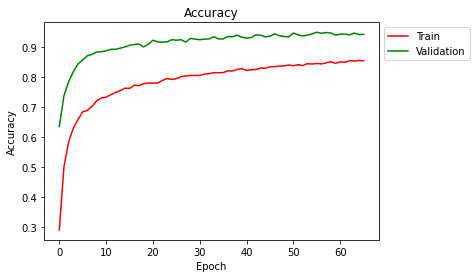

In [ ]:
plt.plot(model.history.history['accuracy'],c='red')
plt.plot(model.history.history['val_accuracy'],c='green')
plt.title('Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left', bbox_to_anchor = (1,1))

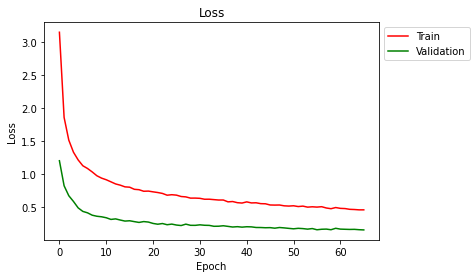

In [ ]:
plt.plot(model.history.history['loss'],c='red')
plt.plot(model.history.history['val_loss'],c='green')
plt.title('Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'],loc='upper left', bbox_to_anchor=(1,1))

In [ ]:
# Evaluate on test data 

model.evaluate(test_gemerator)

5/5 [==============================] - 4s 775ms/step - loss: 0.1245 - accuracy: 0.9573


[0.12445838749408722, 0.9573333263397217]

In [ ]:
# Testing

dic=test_gemerator.class_indices
icd={k:v for v,k in dic.items()}
def output(location):
    img=load_img(location,target_size=(224,224,3))
    img=img_to_array(img)
    img=img/255
    img=np.expand_dims(img,[0])
    answer=model.predict_classes(img)
    probability=round(np.max(model.predict_proba(img)*100),2)
    print (probability, ' % chances are there that the bird is',icd[answer[0]])

96.69  % chances are there that the bird is ALBATROSS


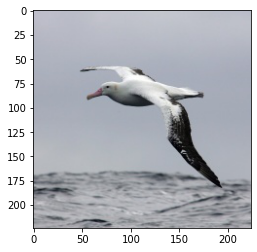

In [ ]:
img='/content/test/ALBATROSS/1.jpg'
pic=load_img('/content/test/ALBATROSS/1.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)

98.73  % chances are there that the bird is ANTBIRD


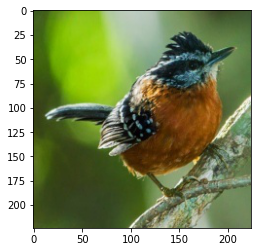

In [ ]:
img='/content/test/ANTBIRD/5.jpg'
pic=load_img('/content/test/ANTBIRD/5.jpg',target_size=(224,224,3))
plt.imshow(pic)
output(img)